In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-reco/insurance.csv


In [2]:
Data = '/kaggle/input/insurance-reco/insurance.csv'
df_org = pd.read_csv(Data)

In [3]:
df= df_org.copy()

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualizing the data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

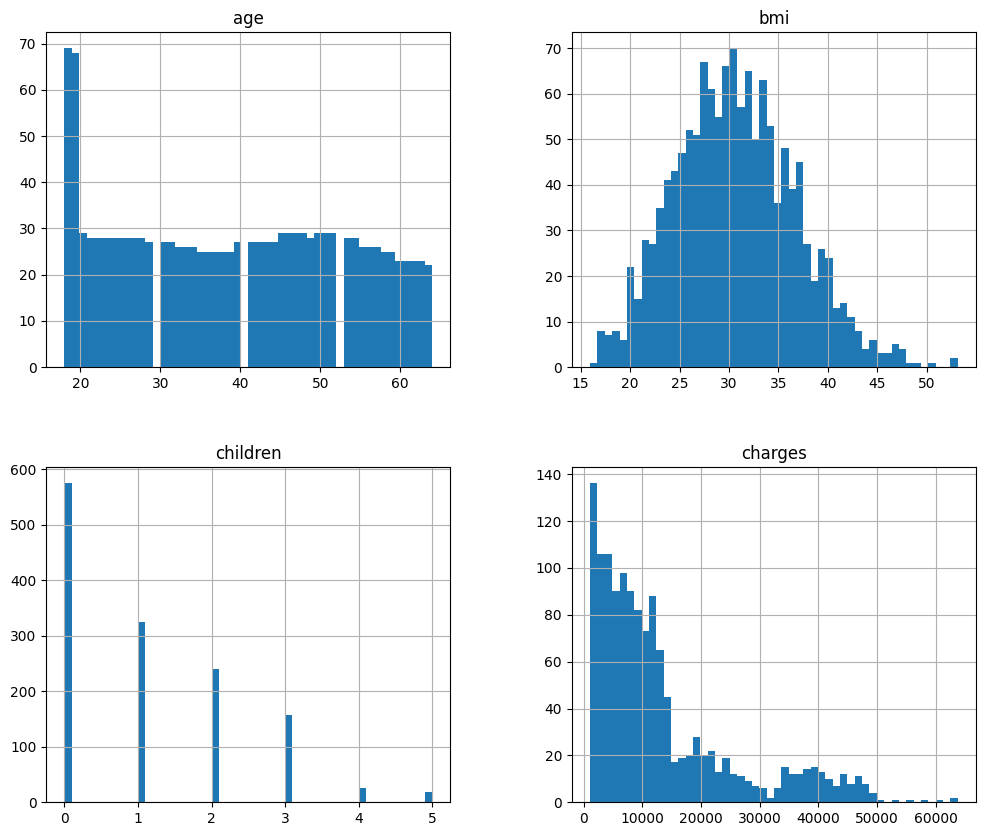

In [8]:
df.hist(bins=50,figsize=(12,10))

In [9]:
import matplotlib.pyplot as plt

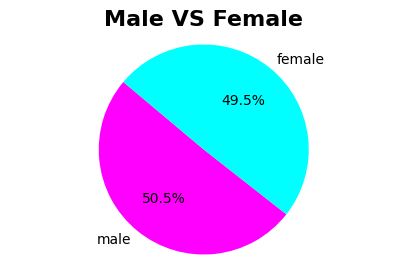

In [10]:
df['sex'].value_counts().plot(
    kind='pie', 
    title='Male VS Female', 
    autopct='%1.1f%%', 
    figsize=(5, 3),
    colors=['magenta', 'cyan'],  
    startangle=140  
)


plt.title('Male VS Female', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.ylabel('')
plt.show()

In [11]:
df.sort_values(['charges'], ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...
22,18,male,34.100,0,no,southeast,1137.01100
663,18,male,33.660,0,no,southeast,1136.39940
1244,18,male,33.330,0,no,southeast,1135.94070
808,18,male,30.140,0,no,southeast,1131.50660


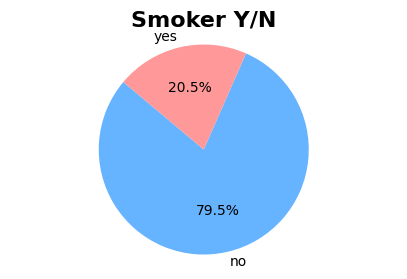

In [12]:
df['smoker'].value_counts().plot(
    kind='pie', 
    title='Is smoker?', 
    autopct='%1.1f%%', 
    figsize=(5, 3),
    colors=['#66b3ff', '#ff9999'],  
    startangle=140  
)


plt.title('Smoker Y/N', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.ylabel('')
plt.show()

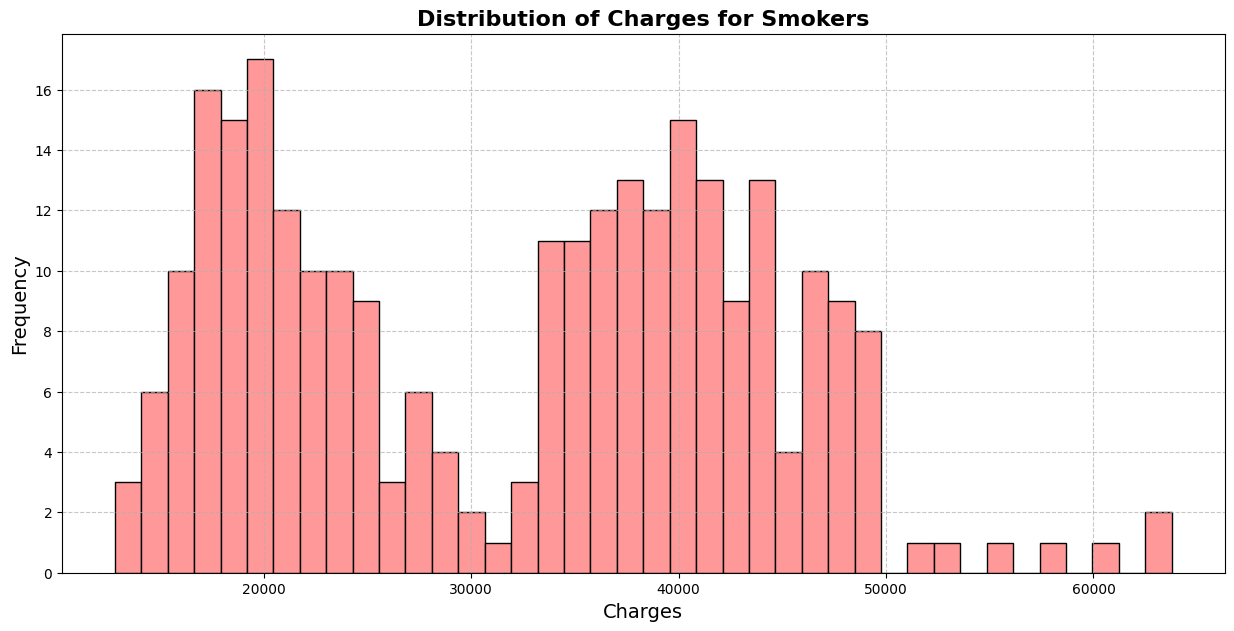

Mean charges for smokers: 32050.23


In [13]:
df[df['smoker'] == 'yes']['charges'].hist(bins=40, figsize=(15, 7), color='#ff9999', edgecolor='black')


plt.title('Distribution of Charges for Smokers', fontsize=16, fontweight='bold')
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


mean_charges_smokers = df[df['smoker'] == 'yes']['charges'].mean()
print(f'Mean charges for smokers: {mean_charges_smokers:.2f}')


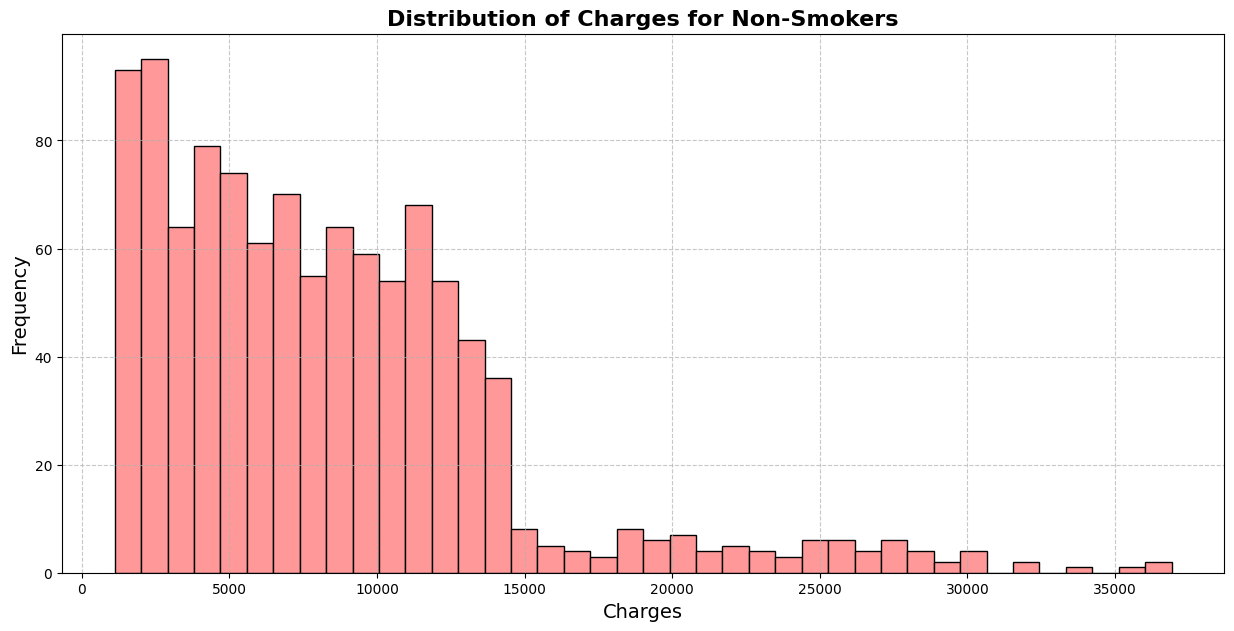

Mean charges for smokers: 8434.27


In [14]:
df[df['smoker'] == 'no']['charges'].hist(bins=40, figsize=(15, 7), color='#ff9999', edgecolor='black')


plt.title('Distribution of Charges for Non-Smokers', fontsize=16, fontweight='bold')
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


mean_charges_Non_smokers = df[df['smoker'] == 'no']['charges'].mean()
print(f'Mean charges for smokers: {mean_charges_Non_smokers:.2f}')

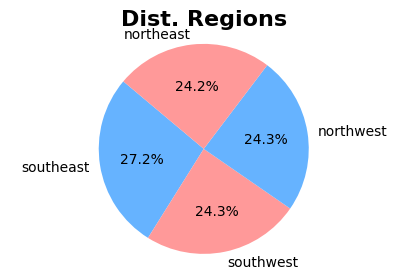

In [15]:
df['region'].value_counts().plot(
    kind='pie', 
    title='Diff Regions', 
    autopct='%1.1f%%', 
    figsize=(5, 3),
    colors=['#66b3ff', '#ff9999'],
    startangle=140  
)


plt.title('Dist. Regions', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.ylabel('')
plt.show()

In [16]:
df[df['region'] == 'northwest']['charges'].mean()/24.3

511.0113322621082

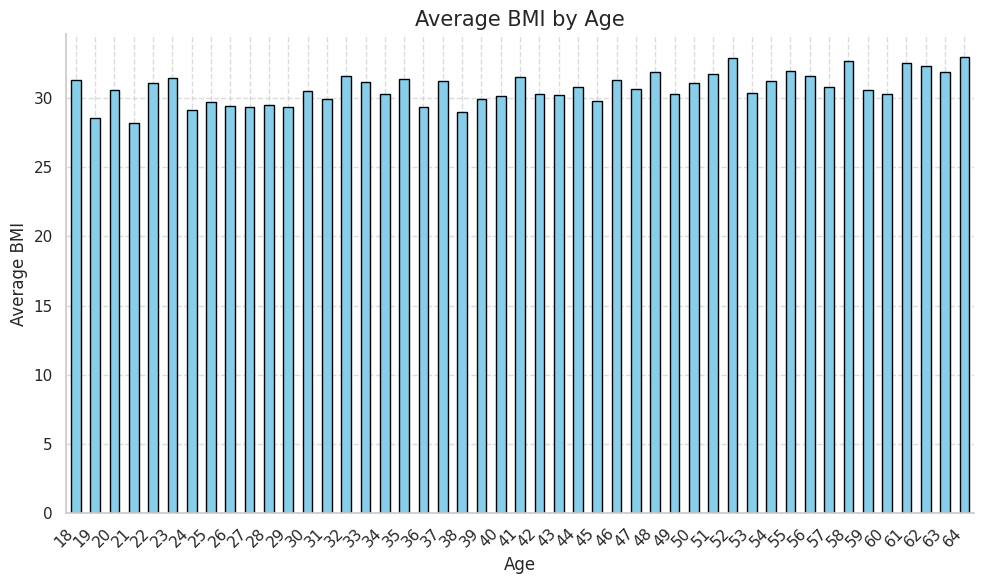

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.set(style="whitegrid")

# Group the data and calculate the mean BMI by age
mean_bmi_by_age = df.groupby(['age'])['bmi'].mean()

ax = mean_bmi_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xticks(rotation=45, ha='right')


plt.xlabel('Age', fontsize=12)
plt.ylabel('Average BMI', fontsize=12)
plt.title('Average BMI by Age', fontsize=15)


plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


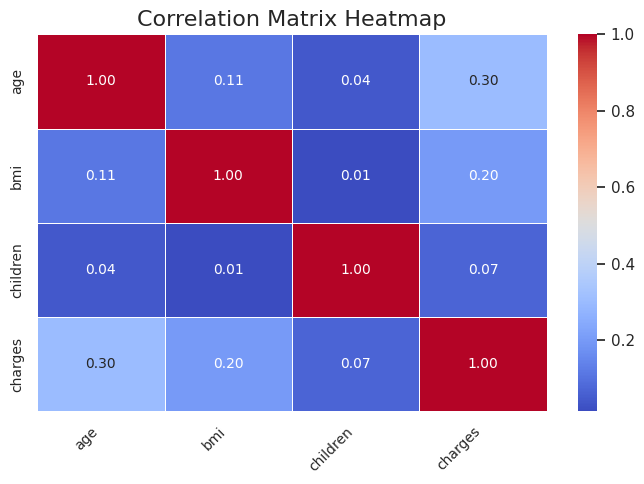

In [18]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(7, 5))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})


plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

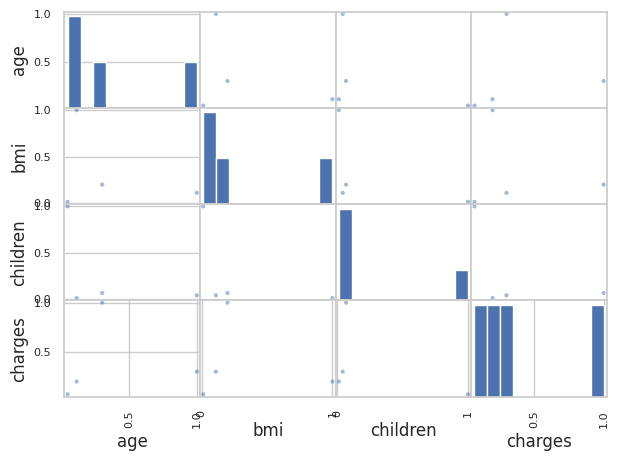

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_matrix, figsize=(7, 5))

<Axes: xlabel='age', ylabel='bmi'>

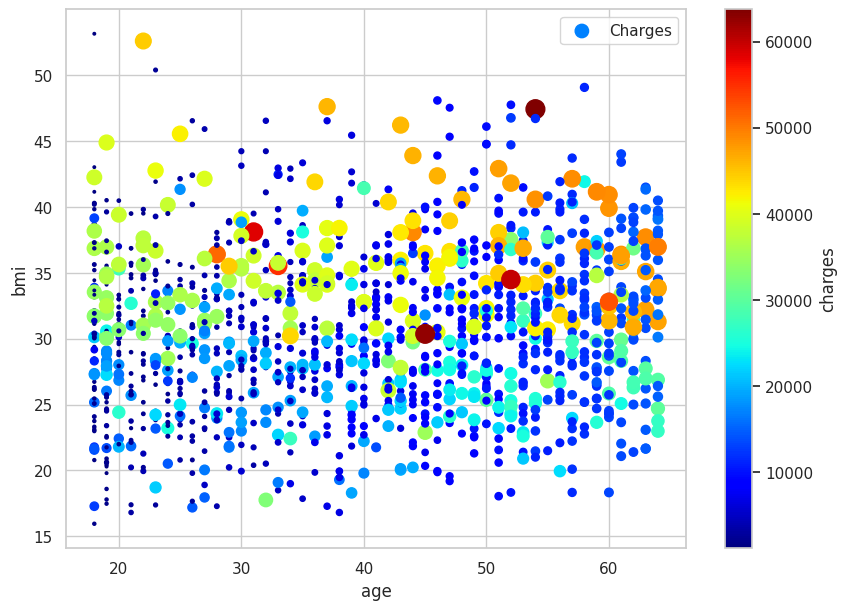

In [20]:
df.plot(kind='scatter',x='age',y='bmi',grid=True,c='charges',cmap='jet',s = df['charges']/350, label='Charges',
         colorbar=True,legend=True, sharex=False, figsize=(10,7))

## Preparing training, test sets

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.8, stratify = df[['sex','age']], random_state=42)


Preparing features and labels

In [22]:
train_X, train_y = train.drop('charges', axis=1).copy(), train['charges'].copy()
test_X, test_y = test.drop('charges', axis=1).copy(), test['charges'].copy()

## Preprocessing

In [23]:
from sklearn.preprocessing import (FunctionTransformer,
                                    StandardScaler,
                                    OneHotEncoder)
from sklearn.impute import SimpleImputer
from sklearn.compose import (ColumnTransformer,
                            make_column_selector)
from sklearn.pipeline import (make_pipeline,
                             Pipeline)

num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler())
Cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(handle_unknown='ignore'))


In [24]:
Preprocessing = ColumnTransformer(transformers=
                                 [
                                    ('CATEGORY', Cat_pipeline, make_column_selector(dtype_include=object)),
                                    ('NUM', num_pipeline, make_column_selector(dtype_include=np.number))
                                 ])

In [25]:
pd.DataFrame(Preprocessing.fit_transform(train_X))

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.335759,1.460861,-0.900712
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.473338,0.885012,-0.900712
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.659623,-0.475563,-0.900712
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.620153,-0.546828,-0.068448
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.090834,-0.453447,0.763816
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.188943,0.246910,-0.068448
1066,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.477956,-1.745216,0.763816
1067,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.441709,-1.622346,-0.900712
1068,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.402239,0.293600,1.596080


## Training Models

### Trying LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
Linear_ = make_pipeline(Preprocessing, LinearRegression())
Linear_.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('CATEGORY',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac774a5bee0>),
                                                 ('NUM',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac76e1daa40>)])),
                ('linearregression', LinearRegression())])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(Linear_, train_X, train_y, scoring='r2', cv=5) 

array([0.74645418, 0.81585624, 0.64860733, 0.711188  , 0.7862582 ])

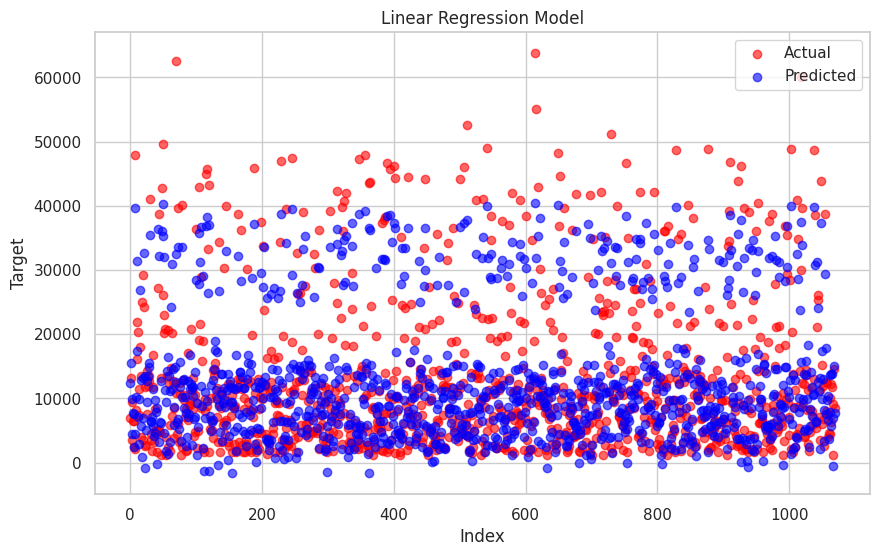

In [28]:
import matplotlib.pyplot as plt


predictions = Linear_.predict(train_X)


plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_y)), train_y, color='red', alpha=0.6, label='Actual')
plt.scatter(range(len(train_y)), predictions, color='blue', alpha=0.6, label='Predicted')
plt.title('Linear Regression Model')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

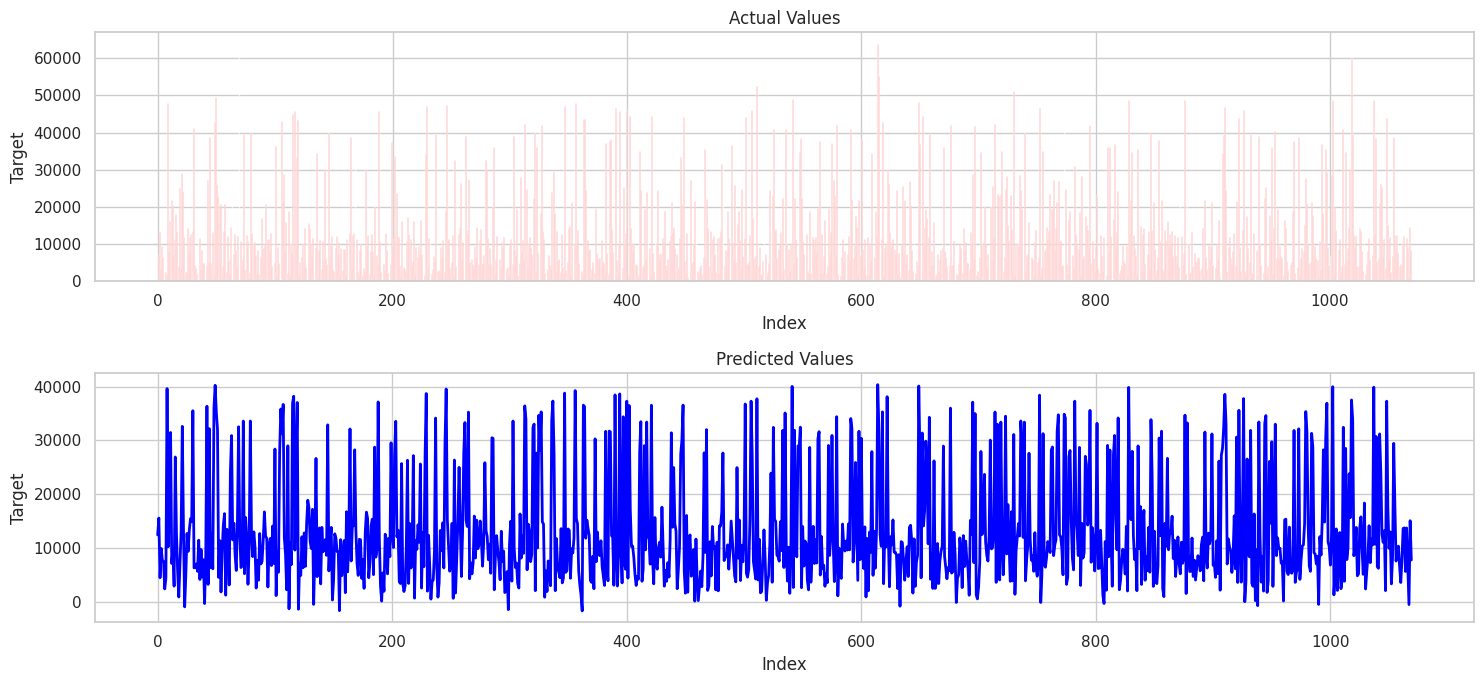

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

# Plotting actual values
axs[0].bar(range(len(train_y)), train_y, color='red', alpha=0.6)
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Target')

# Plotting predicted values
axs[1].plot(range(len(train_y)), predictions, color='blue', linewidth=2)
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Target')

plt.tight_layout()
plt.show()


Linear model can't predict the values beyond 40,000 :( Clearly this will not work for us.

### Trying randomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
RandomForestReg_ = make_pipeline(Preprocessing, RandomForestRegressor(random_state=42))
RandomForestReg_.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('CATEGORY',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac774a5bee0>),
                                                 ('NUM',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac76e1daa40>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [31]:
cross_val_score(RandomForestReg_, train_X, train_y, scoring='r2', cv=5)

array([0.83517934, 0.86372059, 0.74384429, 0.82706708, 0.87310375])

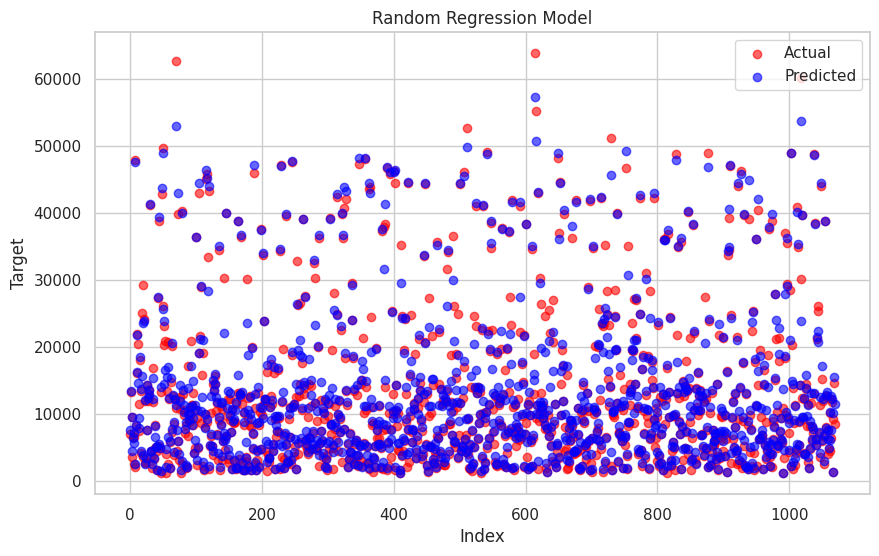

In [32]:
predictions = RandomForestReg_.predict(train_X)


plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_y)), train_y, color='red', alpha=0.6, label='Actual')
plt.scatter(range(len(train_y)), predictions, color='blue', alpha=0.6, label='Predicted')
plt.title('Random Regression Model')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

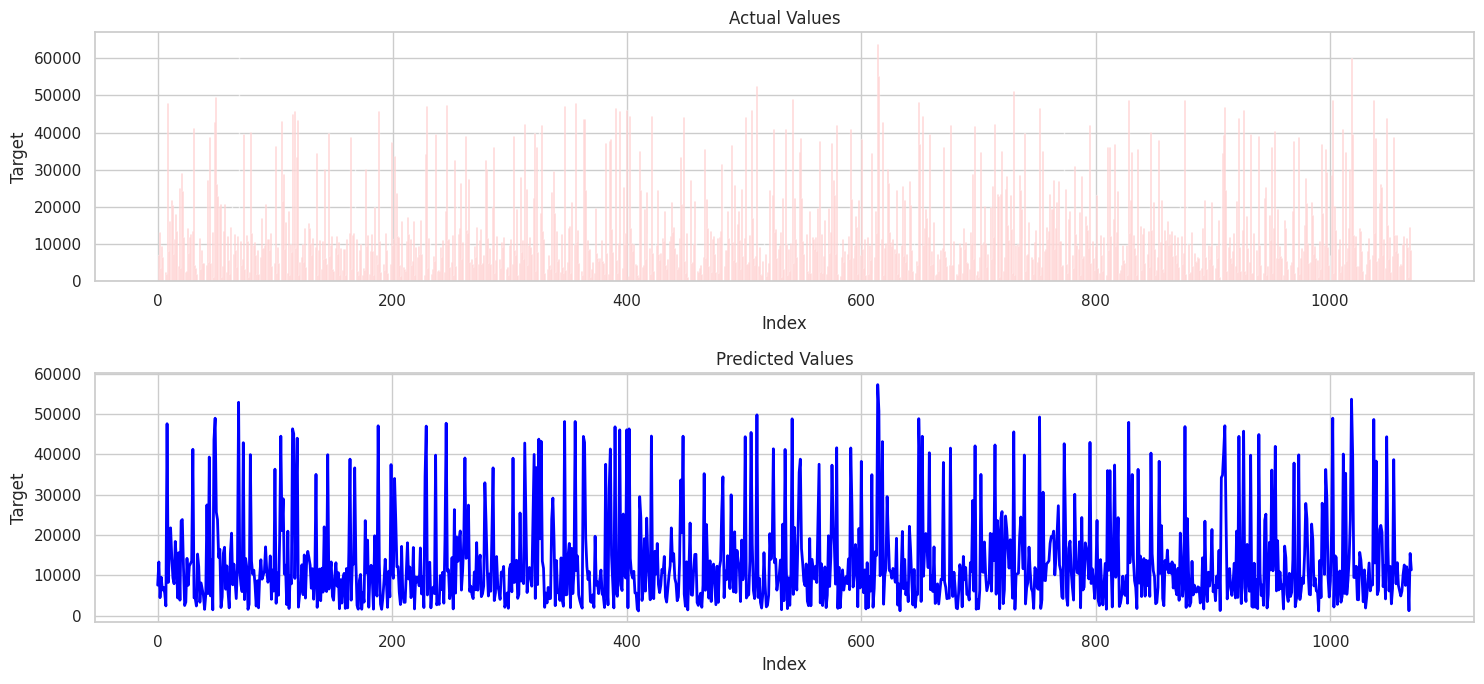

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

# Plotting actual values
axs[0].bar(range(len(train_y)), train_y, color='red', alpha=0.6)
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Target')

# Plotting predicted values
axs[1].plot(range(len(train_y)), predictions, color='blue', linewidth=2)
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Target')

plt.tight_layout()
plt.show()

Fine Tuning the model

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'randomforestregressor__n_estimators': randint(10, 1000),
    'randomforestregressor__max_features': [None, 'sqrt', 'log2', 0.5],
    'randomforestregressor__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200],
    'randomforestregressor__min_samples_split': randint(2, 40),
    'randomforestregressor__min_samples_leaf': randint(1, 40),
    'randomforestregressor__bootstrap': [True, False]
}

Random_ = RandomizedSearchCV(estimator=RandomForestReg_, param_distributions=param_grid, 
                             n_iter=200, cv=5, random_state=42, n_jobs=-1)

Random_.fit(train_X, train_y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('CATEGORY',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7ac774a5bee0>),
                                                                              ('NUM',
                                                                               Pipeline(step...
                                        'randomforestregressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac76b54ff40>,
                                        'randomforestregressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac76b09b3d0>,
                                        'randomforestregressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ac76e1dbb50>},
                   random_state=42)

In [35]:
best_estimator = Random_.best_estimator_

In [36]:
cross_val_score(best_estimator, train_X, train_y, cv=5, scoring='r2')

array([0.87724709, 0.89539561, 0.76438923, 0.844816  , 0.89578858])

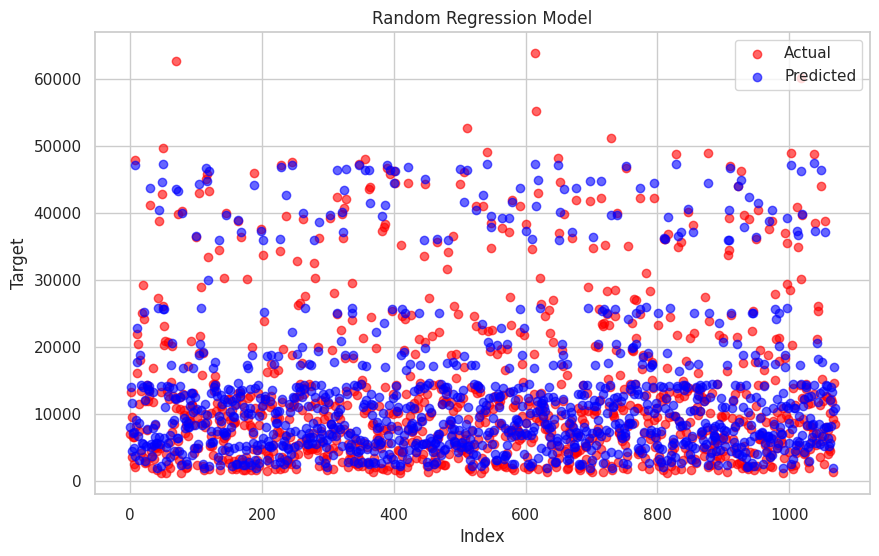

In [37]:
predictions = best_estimator.predict(train_X)


plt.figure(figsize=(10, 6))
plt.scatter(range(len(train_y)), train_y, color='red', alpha=0.6, label='Actual')
plt.scatter(range(len(train_y)), predictions, color='blue', alpha=0.6, label='Predicted')
plt.title('Random Regression Model')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

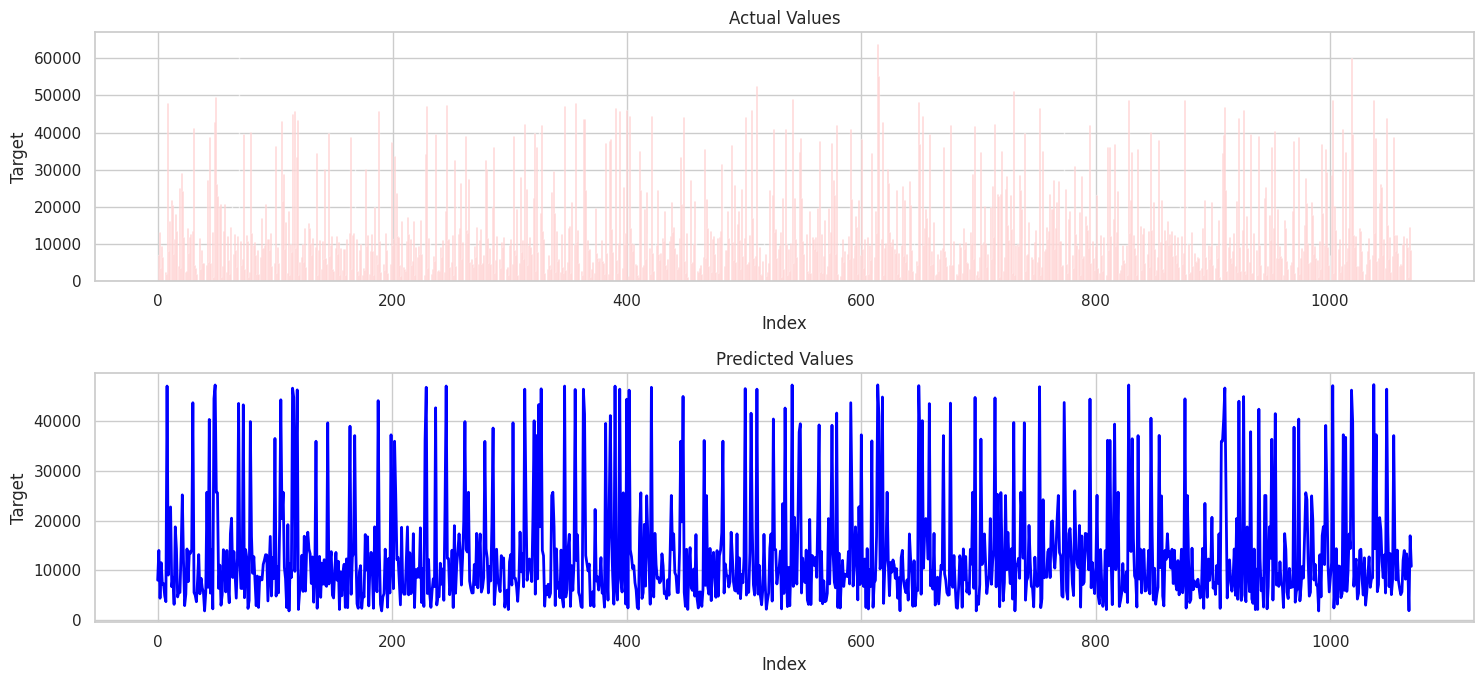

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

# Plotting actual values
axs[0].bar(range(len(train_y)), train_y, color='red', alpha=0.6)
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Target')

# Plotting predicted values
axs[1].plot(range(len(train_y)), predictions, color='blue', linewidth=2)
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Target')

# Show plot
plt.tight_layout()
plt.show()

# Testing the model with test sets

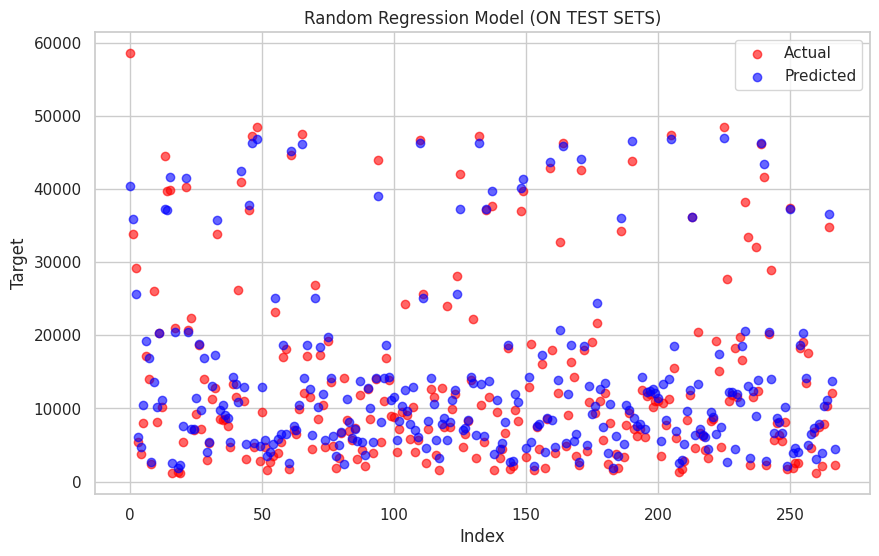

In [39]:
predictions = best_estimator.predict(test_X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(test_y)), test_y, color='red', alpha=0.6, label='Actual')
plt.scatter(range(len(test_y)), predictions, color='blue', alpha=0.6, label='Predicted')
plt.title('Random Regression Model (ON TEST SETS)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

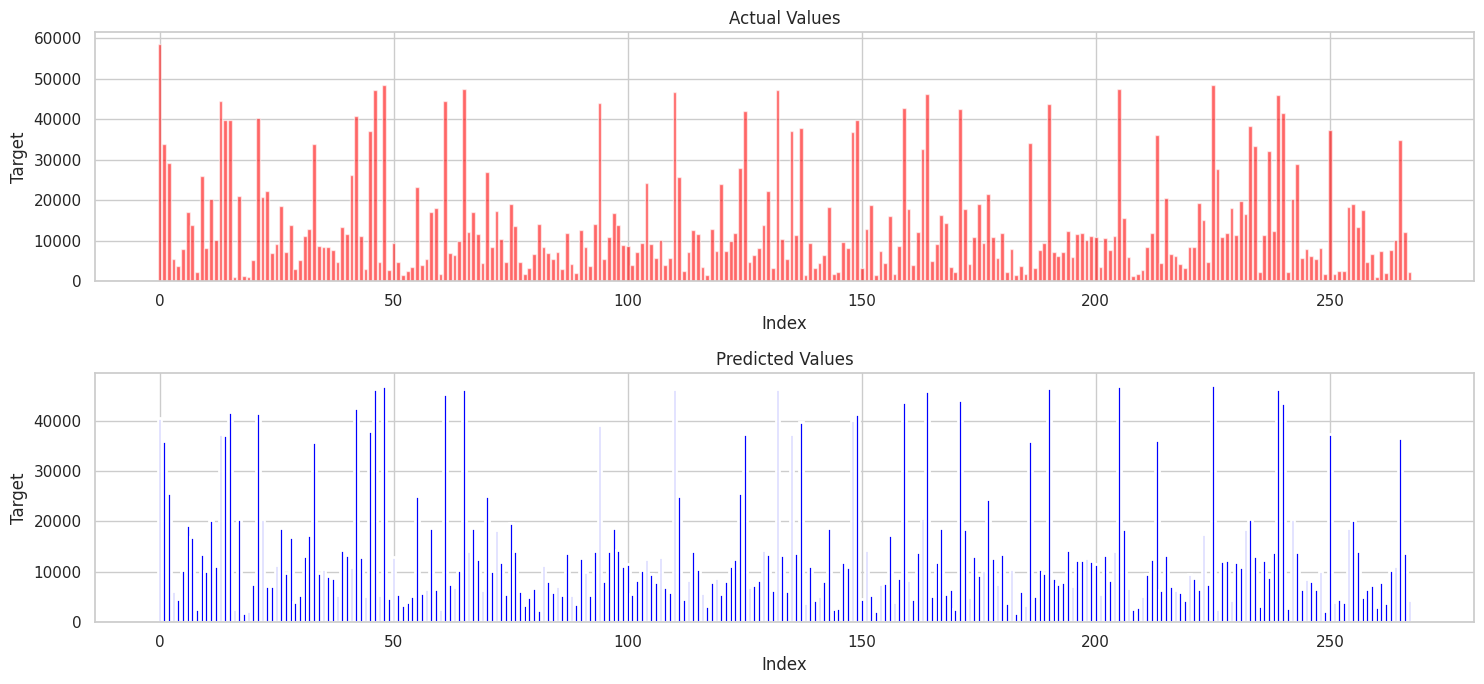

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(15, 7))

# Plotting actual values
axs[0].bar(range(len(test_y)), test_y, color='red', alpha=0.6)
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Target')

# Plotting predicted values
axs[1].bar(range(len(test_y)), predictions, color='blue', linewidth=2)
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Target')

# Show plot
plt.tight_layout()
plt.show()

In [41]:
best_estimator.score(test_X,test_y) 

0.8631224120785923

## Model Info and Accuracy

In [42]:
print(f'Accuracy : {best_estimator.score(test_X,test_y) * 100}')

Accuracy : 86.31224120785923


In [43]:
print(best_estimator.feature_names_in_)

['age' 'sex' 'bmi' 'children' 'smoker' 'region']


In [44]:
best_estimator

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('CATEGORY',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac76b7a37f0>),
                                                 ('NUM',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac76b7a3d00>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       min_samples_leaf=15, min_samples_split=9,
                                       n_estimators=710, random_state=42))])

In [45]:
best_estimator.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('CATEGORY',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ac76b7a37f0>),
                                                 ('NUM',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
            